 <div align=center>
    <font color=green size=6>
    <br />
 Exploratory Data Analysis
    <br/>
    </font>
    </div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

# import the necessary libraries
import pandas as pd
import numpy as np

In [2]:
# read data from train_dataset.csv
all_data = pd.read_csv("train_dataset.csv")
n = len(all_data)

# replace (-1) values with np.nan
all_data.replace(-1, np.nan, inplace=True)
all_data.replace('-1', np.nan, inplace=True)

# set dataset sizes / train_set:80%, validation_set:10%, test_set:10%
train_size=int(n*0.80)
dev_size=int(n*0.10)
test_size=n-train_size-dev_size

# build datasets
train_data=all_data.iloc[:train_size]
dev_data=all_data.iloc[train_size:train_size+dev_size]
test_data=all_data.iloc[-test_size:]


In [3]:
# checking product price column
train_data[train_data['Sale'] == False][['Sale','product_price']].describe()

,Sale,product_price
count,69071.0,69071.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


In [4]:
# useful information about dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sale                       80000 non-null  int64  
 1   SalesAmountInEuro          10929 non-null  float64
 2   time_delay_for_conversion  10886 non-null  float64
 3   click_timestamp            80000 non-null  object 
 4   nb_clicks_1week            43188 non-null  float64
 5   product_price              80000 non-null  float64
 6   product_age_group          19455 non-null  object 
 7   device_type                79968 non-null  object 
 8   audience_id                22633 non-null  object 
 9   product_gender             19464 non-null  object 
 10  product_brand              27414 non-null  object 
 11  product_category(1)        43628 non-null  object 
 12  product_category(2)        43618 non-null  object 
 13  product_category(3)        38177 non-null  obj

In [5]:
# uniqueness of columns
uniqueness=pd.DataFrame()
for column in train_data.columns:
    uniqueness.append({"name":column,"uniquness":round((len(train_data[column].unique())/((~train_data[column].isnull()).sum()+1))*100,2)}, ignore_index=True)
    print(column, f"{round((len(train_data[column].unique())/((~train_data[column].isnull()).sum()+1))*100,2)}% #unique:{len(train_data[column].unique())}   unmissing:{round((((~train_data[column].isnull()).sum()+1)/len(train_data))*100,2)}")

Sale 0.0% #unique:2   unmissing:100.0
SalesAmountInEuro 67.99% #unique:7431   unmissing:13.66
time_delay_for_conversion 70.24% #unique:7647   unmissing:13.61
click_timestamp 72.06% #unique:57646   unmissing:100.0
nb_clicks_1week 2.62% #unique:1133   unmissing:53.99
product_price 4.87% #unique:3893   unmissing:100.0
product_age_group 0.05% #unique:9   unmissing:24.32
device_type 0.01% #unique:4   unmissing:99.96
audience_id 12.87% #unique:2914   unmissing:28.29
product_gender 0.06% #unique:11   unmissing:24.33
product_brand 15.73% #unique:4312   unmissing:34.27
product_category(1) 0.05% #unique:22   unmissing:54.54
product_category(2) 0.33% #unique:145   unmissing:54.52
product_category(3) 1.78% #unique:679   unmissing:47.72
product_category(4) 3.78% #unique:874   unmissing:28.88
product_category(5) 6.61% #unique:421   unmissing:7.96
product_category(6) 8.86% #unique:84   unmissing:1.18
product_category(7) 100.0% #unique:1   unmissing:0.0
product_country 0.03% #unique:17   unmissing:76.

 <div align=left>
    <font color=blue size=4>
    <br />
 Analyse Product Category column
    <br/>
    </font>
    </div>

,Sale
product_country,
2AC62132FBCFA093B9426894A4BC6278,10963
57A1D462A03BD076E029CF9310C11FC5,30399
989EEF92F2A525DD896557425EA7C4C7,11750
B1D897877EBD2BCE4A722DF0581CDAF5,1264
D963E3BCE149E71F5D5E3000DCF68A9F,5595


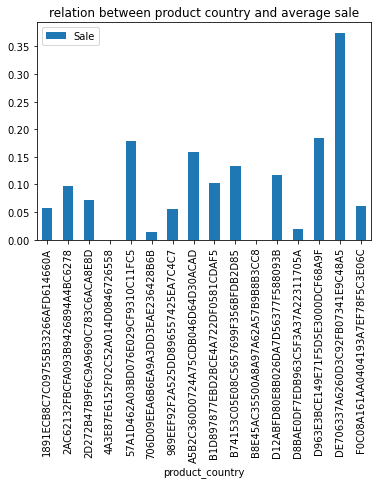

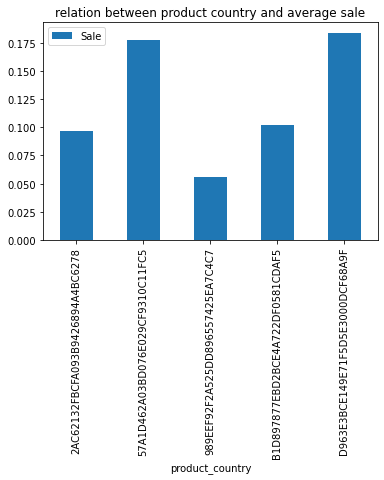

In [6]:
# product_country
train_data[['product_country', 'Sale']].groupby('product_country').mean().plot.bar(y='Sale', title="relation between product country and average sale")
train_data[['product_country', 'Sale']].groupby('product_country').filter(lambda x: len(x) > 1000).groupby('product_country').mean().plot.bar(y='Sale', title="relation between product country and average sale")
train_data[['product_country', 'Sale']].groupby('product_country').filter(lambda x: len(x) > 1000).groupby('product_country').count()


 <div align=left>
    <font color=blue size=4>
    <br />
 Analyse Product Brand column
    <br/>
    </font>
    </div>

,Sale
product_brand,
05F88AFBDD21B32DEF06CAFC314AAF49,0.171875
198F0A3784FB28D104AFA135F5540421,0.000000
24D4F8D30C3029FD1D24B305FDC06DBE,0.097938
2580744E12A499F2C41BB3746EE1BFB5,0.125984
271B3C1DD6DC0D06C67B540F4257F6F7,0.180328
3025C20325FC9F759EAE024D4BC7EAD3,0.173077
323CB375A44A7423EDED31D92B6AE0E2,0.192308
3BB2AD395EC35EAC138F542215460325,0.274336
47188859656650964952DB5A346CE33A,0.309735


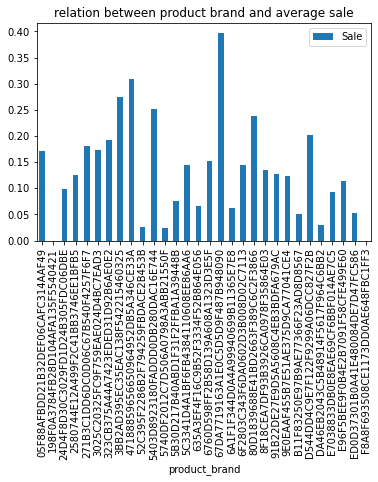

In [7]:
train_data[['product_brand', 'Sale']].groupby('product_brand').filter(lambda x: len(x) > 100).groupby('product_brand').mean().plot.bar(y='Sale', title="relation between product brand and average sale")
train_data[['product_brand', 'Sale']].groupby('product_brand').filter(lambda x: len(x) > 100).groupby('product_brand').mean()
# brand with mean = 0.134 is 8F18CEA7DF93B3926CA0978F35864E03

 <div align=left>
    <font color=blue size=4>
    <br />
 Analyse Product Age Group column
    <br/>
    </font>
    </div>

,Sale
product_age_group,
0CD76C7030D0900BE250C8D41703D180,704
3FEC071EF6B3D061D8804E0522FF4D2A,25
4C90FD52FC53D2C1C205844CB69575AB,14270
538912C31E773613AB51FBAE58492476,190
88460293E9517D21E39AA889BD5AADC8,2198
921B36149E5B081FD24450BFE2CE4430,1928
D72D7E92251E4C54C786FDEFFA4DEF5A,23
E7BD5A29457B8E92582951B586319A9C,117


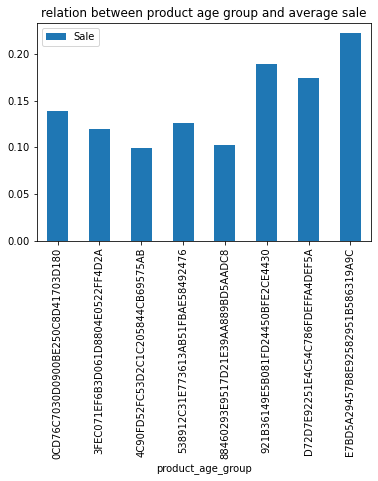

In [8]:
train_data[['product_age_group', 'Sale']].groupby('product_age_group').mean().plot.bar(y='Sale', title="relation between product age group and average sale")
train_data[['product_age_group', 'Sale']].groupby('product_age_group').count()

 <div align=left>
    <font color=blue size=4>
    <br />
 Analyse Device Type column
    <br/>
    </font>
    </div>

<AxesSubplot:title={'center':'relation between device type and average sale'}, xlabel='device_type'>

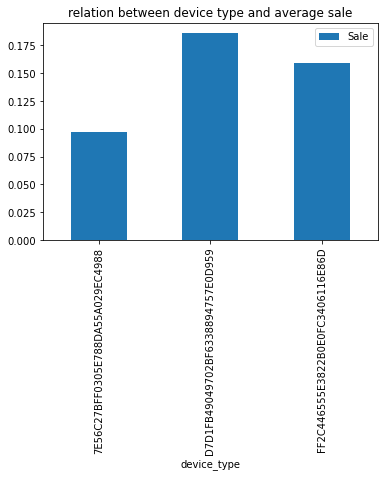

In [9]:
train_data[['device_type', 'Sale']].groupby('device_type').mean().plot.bar(y='Sale', title="relation between device type and average sale")

 <div align=left>
    <font color=blue size=4>
    <br />
 Analyse Product Gender column
    <br/>
    </font>
    </div>

,Sale
product_gender,
0FB06F1EAC1E00A436B336C5DF3C14AF,4
1B491180398E2F0390E6A588B3BCE291,6769
26FE89E9DD2E6FC18AA5BE1F6D5A6870,19
28F311FA00BD3B4D076659D87EE3AE8D,142
6EFABCEDA36A931DBF760F88970BAF0E,110
86E2AFBF909EC95B069893FF0BBC5B26,46
A5D15FC386510762EC0DDFF54ABE6F94,9305
C45A9AC6D102ACAEEDF0D6F78636D84A,2587
D7B42B0C4D807EF1C13F79948743E9DA,457


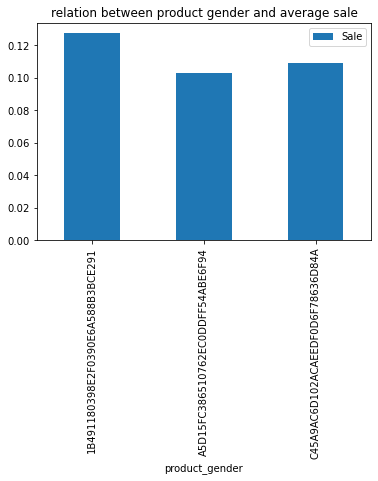

In [10]:
train_data[['product_gender', 'Sale']].groupby('product_gender').filter(lambda x: len(x) > 600).groupby('product_gender').mean().plot.bar(y='Sale', title="relation between product gender and average sale", )
train_data[['product_gender', 'Sale']].groupby('product_gender').count()

 <div align=left>
    <font color=blue size=4>
    <br />
 Analyse Audience Id column
    <br/>
    </font>
    </div>

,Sale
audience_id,
18308B5D3E2435A2D8F15B91512F133E,98
18986E2C71CFEDC2FFC210F6F6C600D2,259
1A86196AD2AAE80454E590D7CA6F74EB,134
1D0E30BAA4D8F6E1CB9412930BE16B51,118
1E0A265DBCEA5404DF8101B5ADFBE9AB,72
25A0348A2683AE60EC333C4B2C62B167,75
2F89384F5373F64EA809EEC44387F05E,324
314D227E5E7439B113641DA1354F464E,74
359D48C769B8785FA5542DD8607C8723,389


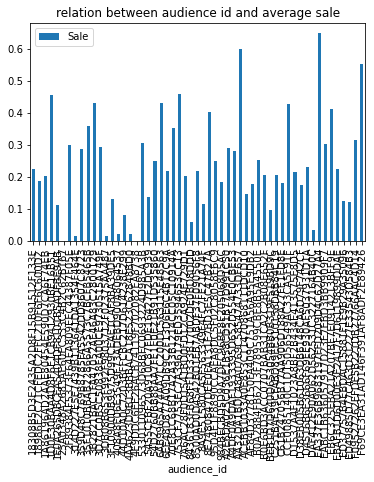

In [11]:
train_data[['audience_id', 'Sale']].groupby('audience_id').filter(lambda x: len(x) > 70).groupby('audience_id').mean().plot.bar(y='Sale', title="relation between audience id and average sale")
train_data[['audience_id', 'Sale']].groupby('audience_id').filter(lambda x: len(x) > 70).groupby('audience_id').count()

 <div align=left>
    <font color=blue size=4>
    <br />
 Analyse Click Timestamp column
    <br/>
    </font>
    </div>

<AxesSubplot:title={'center':'relation between click hour and average sale'}, xlabel='hour_of_click'>

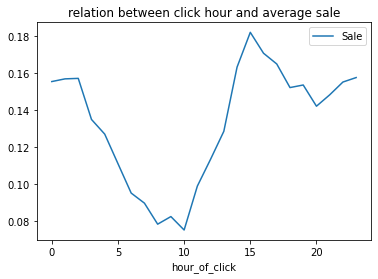

In [12]:
train_data['click_timestamp']=pd.to_datetime(all_data['click_timestamp'], format="%Y-%m-%d %H:%M:%S")
train_data['hour_of_click']=train_data['click_timestamp'].dt.hour
###### validation and test set
dev_data['click_timestamp']=pd.to_datetime(all_data['click_timestamp'], format="%Y-%m-%d %H:%M:%S")
dev_data['hour_of_click']=dev_data['click_timestamp'].dt.hour
test_data['click_timestamp']=pd.to_datetime(all_data['click_timestamp'], format="%Y-%m-%d %H:%M:%S")
test_data['hour_of_click']=test_data['click_timestamp'].dt.hour

train_data[['hour_of_click', 'Sale']].groupby('hour_of_click').mean().plot(title="relation between click hour and average sale")

 <div align=left>
    <font color=blue size=4>
    <br />
 Analyse NB Clicks 1Week column
    <br/>
    </font>
    </div>

<AxesSubplot:title={'center':'relation between nb_clicks_1week and average sale'}, xlabel='nb_clicks_1week'>

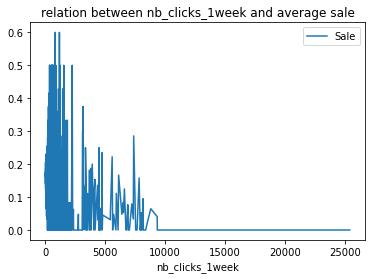

In [13]:
train_data[['nb_clicks_1week', 'Sale']].groupby('nb_clicks_1week').filter(lambda x: len(x) > 0).groupby('nb_clicks_1week').mean().plot(title="relation between nb_clicks_1week and average sale")

 <div align=left>
    <font color=blue size=4>
    <br />
 Analyse Partner Id column
    <br/>
    </font>
    </div>

<AxesSubplot:title={'center':'number of clicks'}, xlabel='partner_id'>

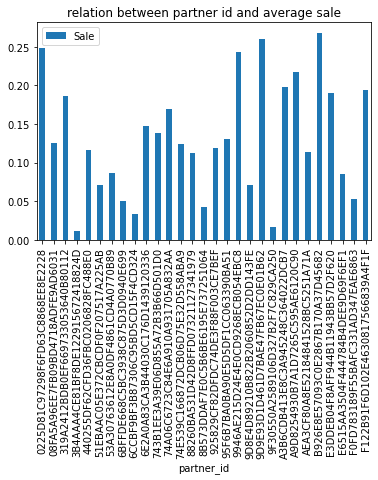

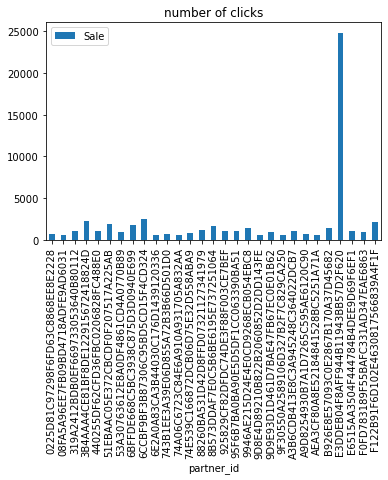

In [14]:
train_data[['partner_id', 'Sale']].groupby('partner_id').filter(lambda x: len(x) > 500).groupby('partner_id').mean().plot.bar(y='Sale', title="relation between partner id and average sale")
train_data[['partner_id', 'Sale']].groupby('partner_id').filter(lambda x: len(x) > 500).groupby('partner_id').count().plot.bar(y='Sale', title="number of clicks")

 <div align=center>
    <font color=green size=6>
    <br />
Feature Engineering
    <br/>
    </font>
    </div>

In [15]:
import importlib
import feature_enginier
importlib.reload(feature_enginier)
import copy

In [16]:
feature_builder=feature_enginier.feature_engineering(data=train_data)
feature_builder.clean_function()
feature_builder.change_data(dev_data, train=False)
feature_builder.clean_function()
feature_builder.change_data(test_data, train=False)
feature_builder.clean_function()

build model and training it

import model components

In [17]:
import torch
import datasets, modules, utils
importlib.reload(datasets)
importlib.reload(modules)
importlib.reload(utils)
print("import required things")

import required things


start with testing Wide deep model testing.

In [18]:
#initialization
epochs = 2
lr = 0.00001
batch_size = 200
device = "cpu"
model = modules.WideDeepModel([4, 4, 6, 22, 8], 5)
class_weight = torch.tensor([0.13, 0.87])
utils.train_and_eval_model(epochs, lr, batch_size, device, model, class_weight, train_data, dev_data)

manual f1 score= 0.3211876153945923
              precision    recall  f1-score   support

       False       0.94      0.51      0.66      8627
        True       0.20      0.78      0.32      1373

    accuracy                           0.55     10000
   macro avg       0.57      0.65      0.49     10000
weighted avg       0.84      0.55      0.61     10000

manual f1 score= 0.3243154287338257
              precision    recall  f1-score   support

       False       0.93      0.57      0.71      8627
        True       0.21      0.72      0.32      1373

    accuracy                           0.59     10000
   macro avg       0.57      0.64      0.52     10000
weighted avg       0.83      0.59      0.65     10000



(0.3243154287338257, 0.7159504890441895, 0.20963957905769348)

In [ ]:
#initialization
epochs = 2
lr = 0.00001
batch_size = 200
device = "cpu"
model = modules.ResWideDeepModel([4, 4, 6, 22, 8], 5)
class_weight = torch.tensor([0.13, 0.87])
utils.train_and_eval_model(epochs, lr, batch_size, device, model, class_weight, train_data, dev_data)

In [ ]:
#initialization
epochs = 2
lr = 0.001
batch_size = 200
device = "cpu"
model = modules.LinearModel([4, 4, 6, 22, 8], 5)
class_weight = torch.tensor([0.13, 0.87])
utils.train_and_eval_model(epochs, lr, batch_size, device, model, class_weight, train_data, dev_data)

In [ ]:
#initialization
epochs = 2
lr = 0.00001
batch_size = 200
device = "cpu"
model = modules.BaseLine([4, 4, 6, 22, 8], 5)
class_weight = torch.tensor([0.13, 0.87])
utils.train_and_eval_model(epochs, lr, batch_size, device, model, class_weight, train_data, dev_data)

In [ ]:
#hyper parameter tuning
#result shows batch_size=100 and learning rate=0.01 and ResWideDeepModel get the best result
np.random.seed(0)
torch.manual_seed(0)
utils.hyper_parameter_tuning([0.00001, 0.0001, 0.001, 0.01, 0.1], [100, 500, 4000], device,
                             [modules.WideDeepModel, modules.ResWideDeepModel, modules.LinearModel],
                             [[4, 4, 6, 22, 8], 5], class_weight, train_data, dev_data)

In [ ]:
# best model
#initialization

epochs = 6
lr = 0.001
batch_size = 4000
device = "cpu"
model = modules.ResWideDeepModel([4, 4, 6, 22, 8], 5)
class_weight = torch.tensor([0.13, 0.87])
utils.train_and_eval_model(epochs, lr, batch_size, device, model, class_weight, train_data, dev_data)
utils.eval_model((epochs + 1) * 80000, model, utils.build_dataloader(test_data, batch_size), print_res=True, log_result=False)

In [ ]:
# model strength and weaknesses
outputs = []
targets = []
test_dataloader = utils.build_dataloader(test_data, 100)
xs = []
with torch.no_grad():
    for step, (x, y) in enumerate(test_dataloader):
        # forward pass
        x, y = x.to(device), y.to(device)
        output = model(x)
        outputs.append(output)
        targets.append(y)
        xs.append(x)

    xs = torch.cat(xs)
    targets = torch.cat(targets).bool()
    outputs = (torch.cat(outputs) > 0.5).squeeze()
    tp = np.expand_dims(torch.logical_and(targets, outputs), axis=1)
    tn = np.expand_dims(torch.logical_and(~targets, ~outputs), axis=1)
    fn = np.expand_dims(torch.logical_and(targets, ~outputs), axis=1)
    fp = np.expand_dims(torch.logical_and(~targets, outputs), axis=1)
    correct = np.expand_dims((outputs == targets), axis=1)

    xs = xs.numpy()
    df = np.concatenate((xs, correct, tp, tn, fn, fp), axis=1)
    columns = train_data.columns[1:].tolist()
    columns += ['is correct', 'tp', 'tn', 'fn', 'fp']

    categorical_columns = ['device_type', 'gender', 'country', 'sub_category', 'period']
    continues_columns = ['nb_clicks_1week', 'product_age_group_percentage', 'partner_id_percentage',
                         'audience_id_percentage', 'brand_percentage']

    non_columns = []
    for i, column in enumerate(categorical_columns):
        test = copy.deepcopy(test_data)
        group = []
        for j in range(29):
            if column + f" {j}" in test.columns:
                group.append(column + f" {j}")
        mean = test[group].mean()
        most_frequent_column = column + f" {1 + mean.argmax()}"
        non_columns.append(most_frequent_column)
    df = pd.DataFrame(data=df, columns=columns)
    df.replace(((feature_builder.mean - feature_builder.mean_norm) / feature_builder.std_norm).tolist(), np.nan,
               inplace=True)
    df['null numerical'] = len(continues_columns) - df[continues_columns].count(axis=1)
    df['null categorical'] = df[non_columns].sum(axis=1)
    df['null'] = df['null numerical'] + df['null categorical']
    df = df[['null', 'is correct', 'tp', 'tn', 'fn', 'fp']].groupby('null').sum()

    df['presision'] = df['tp'] / (df['tp'] + df['fp'])
    df['recall'] = df['tp'] / (df['tp'] + df['fn'])
    df['f1_score_co'] = 2 * df['presision'] * df['recall'] / (df['presision'] + df['recall'])

    print(df)
    df[['f1_score_co']].plot.bar(y='f1_score_co', title="relation between null number and f1 score")

importance of each columns

In [ ]:
import copy
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

numerical_columns=['nb_clicks_1week', 'product_age_group_percentage', 'partner_id_percentage', 'audience_id_percentage', 'brand_percentage']

f1, _, _= utils.eval_model((epochs + 1) * 80000, model, utils.build_dataloader(test_data, batch_size), print_res=False, log_result=False)
print(f"normal f1={round(f1, 3)}")

importance=np.zeros((1,5))
for i, column in enumerate(numerical_columns):
    test=copy.deepcopy(test_data)
    test[[column]]=0
    f1, _, _=utils.eval_model((epochs + 1) * 80000, model, utils.build_dataloader(test, batch_size), print_res=False, log_result=False)
    print(f"remove {column} f1={round(f1, 3)}")
    importance[0,i]=f1

ax = sns.heatmap(importance, annot=True, fmt="d")
plt.title("f1 score after removing two columns",fontsize=12)

In [ ]:
# dual columns
importance=np.zeros((5,5))
for i, column1 in enumerate(numerical_columns):
    for j, column2 in enumerate(numerical_columns):
        test=copy.deepcopy(test_data)
        test[[column1]]=0
        test[[column2]]=0
        f1, _, _=utils.eval_model((epochs + 1) * 80000, model, utils.build_dataloader(test, batch_size), print_res=False, log_result=False)
        print(f"remove {column1} {column2} f1={round(f1, 3)}")
        importance[i,j]=f1

ax = sns.heatmap(importance, annot=True, fmt="d")
plt.title("f1 score after removing two columns",fontsize=12)

In [ ]:
# categorical features
categorical_columns=['device_type','gender','country','sub_category','period']

f1, _, _=utils.eval_model((epochs + 1) * 80000, model, utils.build_dataloader(test_data, batch_size), print_res=False, log_result=False)
print(f"normal f1={round(f1, 3)}")

importance=np.zeros((1,5))
for i, column in enumerate(categorical_columns):
    test=copy.deepcopy(test_data)
    group=[]
    for j in range(29):
        if column+f" {j}" in test.columns:
            group.append(column+f" {j}")

    mean=test[group].mean()
    most_frequent_column=column+f" {1+mean.argmax()}"

    test[group]=0
    test[[most_frequent_column]]=1

    f1, _, _=utils.eval_model((epochs + 1) * 80000, model, utils.build_dataloader(test, batch_size), print_res=False, log_result=False)
    print(f"remove {column} f1={round(f1, 3)}")
    importance[0,i]=f1

ax = sns.heatmap(importance, annot=True, fmt="d")
plt.title("f1 score after removing two columns",fontsize=12)